In [1]:
import pandas as pd
import keras
from keras.layers import LSTM, SimpleRNN, Input, Bidirectional, TimeDistributed, Dropout, Dense, Activation, BatchNormalization
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
import tensorflow as tf
import numpy as np
import os
import fnmatch
from matplotlib import pyplot as plt
from IPython.display import clear_output
from modules.callbacks import PlotLosses
from modules.lstm_encoder import LSTMEncoder

Using TensorFlow backend.


In [2]:
layers = [
    Dropout(0.2),
    Dense(4096, activation='relu'),
    Dropout(0.2),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Bidirectional(LSTM(1024, return_sequences=True)),
]

## Training

In [3]:
encoder = LSTMEncoder(
    hidden_layers=layers,
    source_path='./features/lstm/2_steps/',
    #weights_path='./convnet_weights/weights.04-0.78.hdf5',
    lr=0.00001,
)

In [4]:
encoder.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2, 6144)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 6144)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2, 4096)           25169920  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 4096)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2, 2048)           8390656   
_________________________________________________________________
dense_3 (Dense)              (None, 2, 2048)           4196352   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2, 2048)           25174016  
__________

In [5]:
plot_losses = PlotLosses()
checkpoint = keras.callbacks.ModelCheckpoint(
    './convnet_weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=False, 
    save_weights_only=True, 
    mode='auto', 
    period=1,
)
callbacks = [plot_losses, checkpoint]

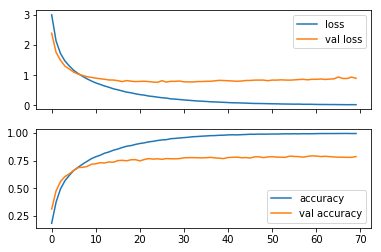

Epoch 1
-----------------------
- Loss: 3.00578315933
- Accuracy: 0.182564503525
- Validation loss: 2.3949830427
- Validation accuracy: 0.311623247449
 
Epoch 2
-----------------------
- Loss: 2.13813746849
- Accuracy: 0.374354964753
- Validation loss: 1.7612193572
- Validation accuracy: 0.476452905812
 
Epoch 3
-----------------------
- Loss: 1.72269178764
- Accuracy: 0.494422726045
- Validation loss: 1.49736489562
- Validation accuracy: 0.56012024287
 
Epoch 4
-----------------------
- Loss: 1.47586582308
- Accuracy: 0.567474589567
- Validation loss: 1.30507713377
- Validation accuracy: 0.605711420337
 
Epoch 5
-----------------------
- Loss: 1.30887042667
- Accuracy: 0.617044566164
- Validation loss: 1.20595861461
- Validation accuracy: 0.631262522422
 
Epoch 6
-----------------------
- Loss: 1.16466608094
- Accuracy: 0.661063330833
- Validation loss: 1.10421936498
- Validation accuracy: 0.661823644667
 
Epoch 7
-----------------------
- Loss: 1.05786606346
- Accuracy: 0.69035704992

Epoch 71/100
120/150 [=======================>......] - ETA: 44s - loss: 0.0234 - categorical_accuracy: 0.9956

KeyboardInterrupt: 

In [6]:
encoder.train(100, callbacks)

## Encoding

In [3]:
encoder = LSTMEncoder(
    hidden_layers=layers,
    source_path='./features/lstm/2_steps/',
    weights_path='./convnet_weights/weights.25-0.77.hdf5',
)

In [4]:
_ = encoder.encode('train', './features/lstm/encoded/features_train.npy')
_ = encoder.encode('dev', './features/lstm/encoded/features_dev.npy')

8/8 [==============================] - 4s 511ms/step


## Predictions

In [ ]:
encoder = LSTMEncoder(
    source_path='./features/lstm/2_steps/',
    regularizer=l2, 
    lr=0.000001,
    weights_path='./convnet_weights/lstm/base/weights.19-1.13.hdf5',
)

In [ ]:
encoder.predict('dev')